In [1]:
import srt_util
import matplotlib.pyplot as plt
import numpy as np
import PhysicsTool as pt
import matplotlib
pt.plotting.set_theme()



In [2]:
def normalize_spectrum(spec: np.ndarray) -> np.ndarray:
    """ Normalize a power spectrum by its maximum value. """
    spec = spec - min(spec)
    spec = spec / max(spec)
    return spec

def plot_sun_scan(hor_file_path: str, ver_file_path: str):
    with srt_util.SRT_HDF_Reader(hor_file_path) as srt_reader:
        offset = srt_reader.get_object_positions()['CenterH']
        spec = normalize_spectrum(srt_reader.get_power_spectrum().sum(axis=1))
        plt.scatter(offset, spec, label = 'Horizontal scan', marker='.')
    with srt_util.SRT_HDF_Reader(ver_file_path) as srt_reader:
        offset = srt_reader.get_object_positions()['CenterV']
        spec = spec = normalize_spectrum(srt_reader.get_power_spectrum().sum(axis=1))
        plt.scatter(offset, spec, label = 'Vertical scan', marker='.')

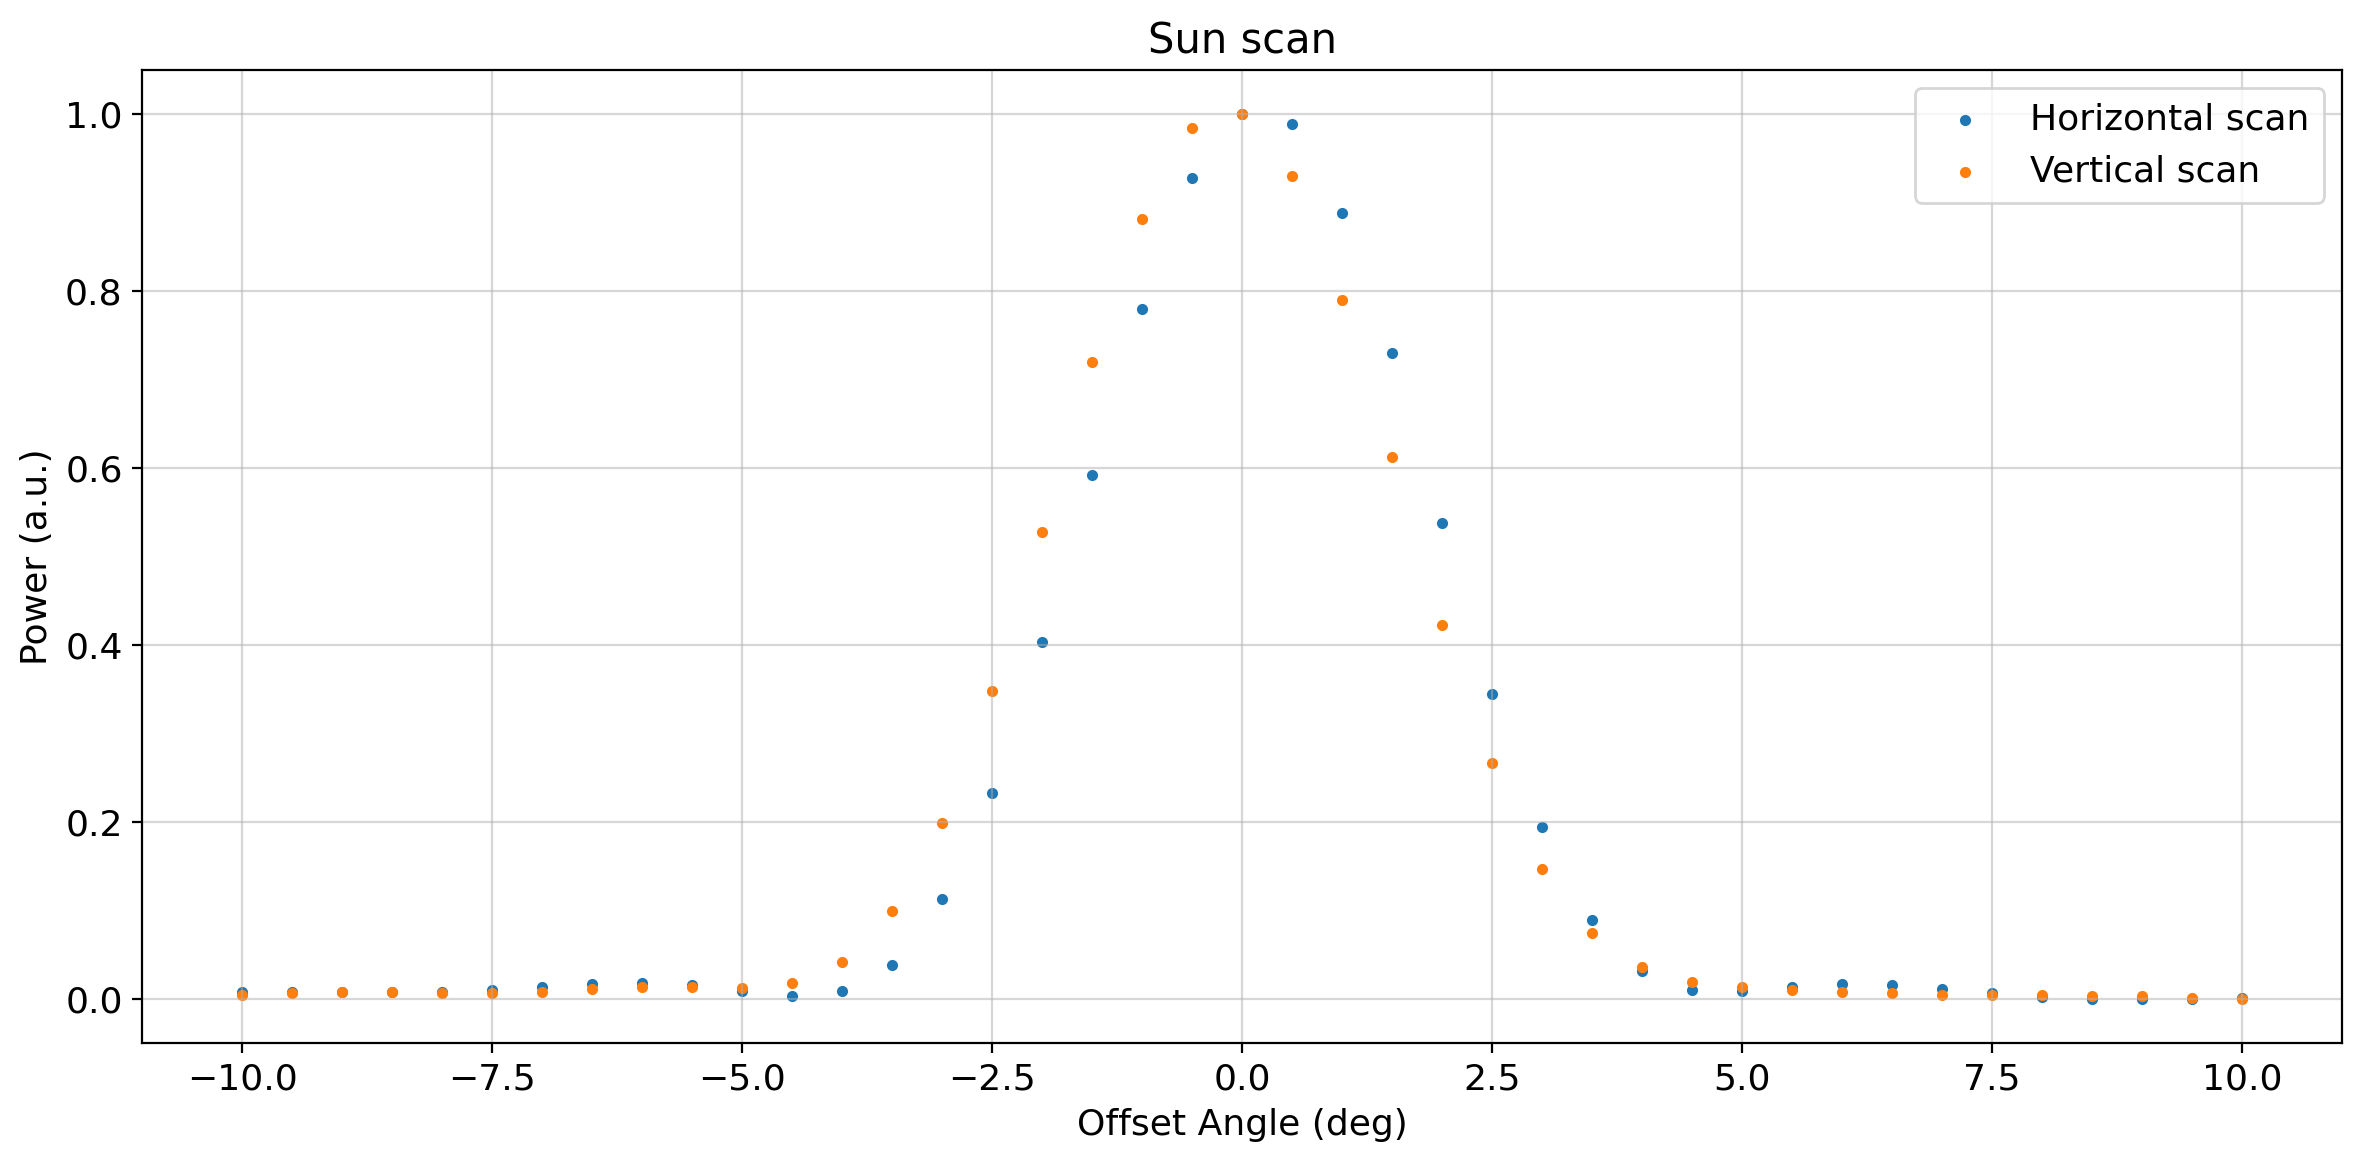

In [3]:
pt.plotting.set_up_plot('Sun scan', 'Offset Angle (deg)', 'Power (a.u.)')
plot_sun_scan('Measurements/SunScan/SunScan_Az10deg_Res0deg5_T1120_20251002.hdf',
              'Measurements/SunScan/SunScan_Elv10deg_Res0deg5_T1120_20251002.hdf')
plt.legend()
plt.show()

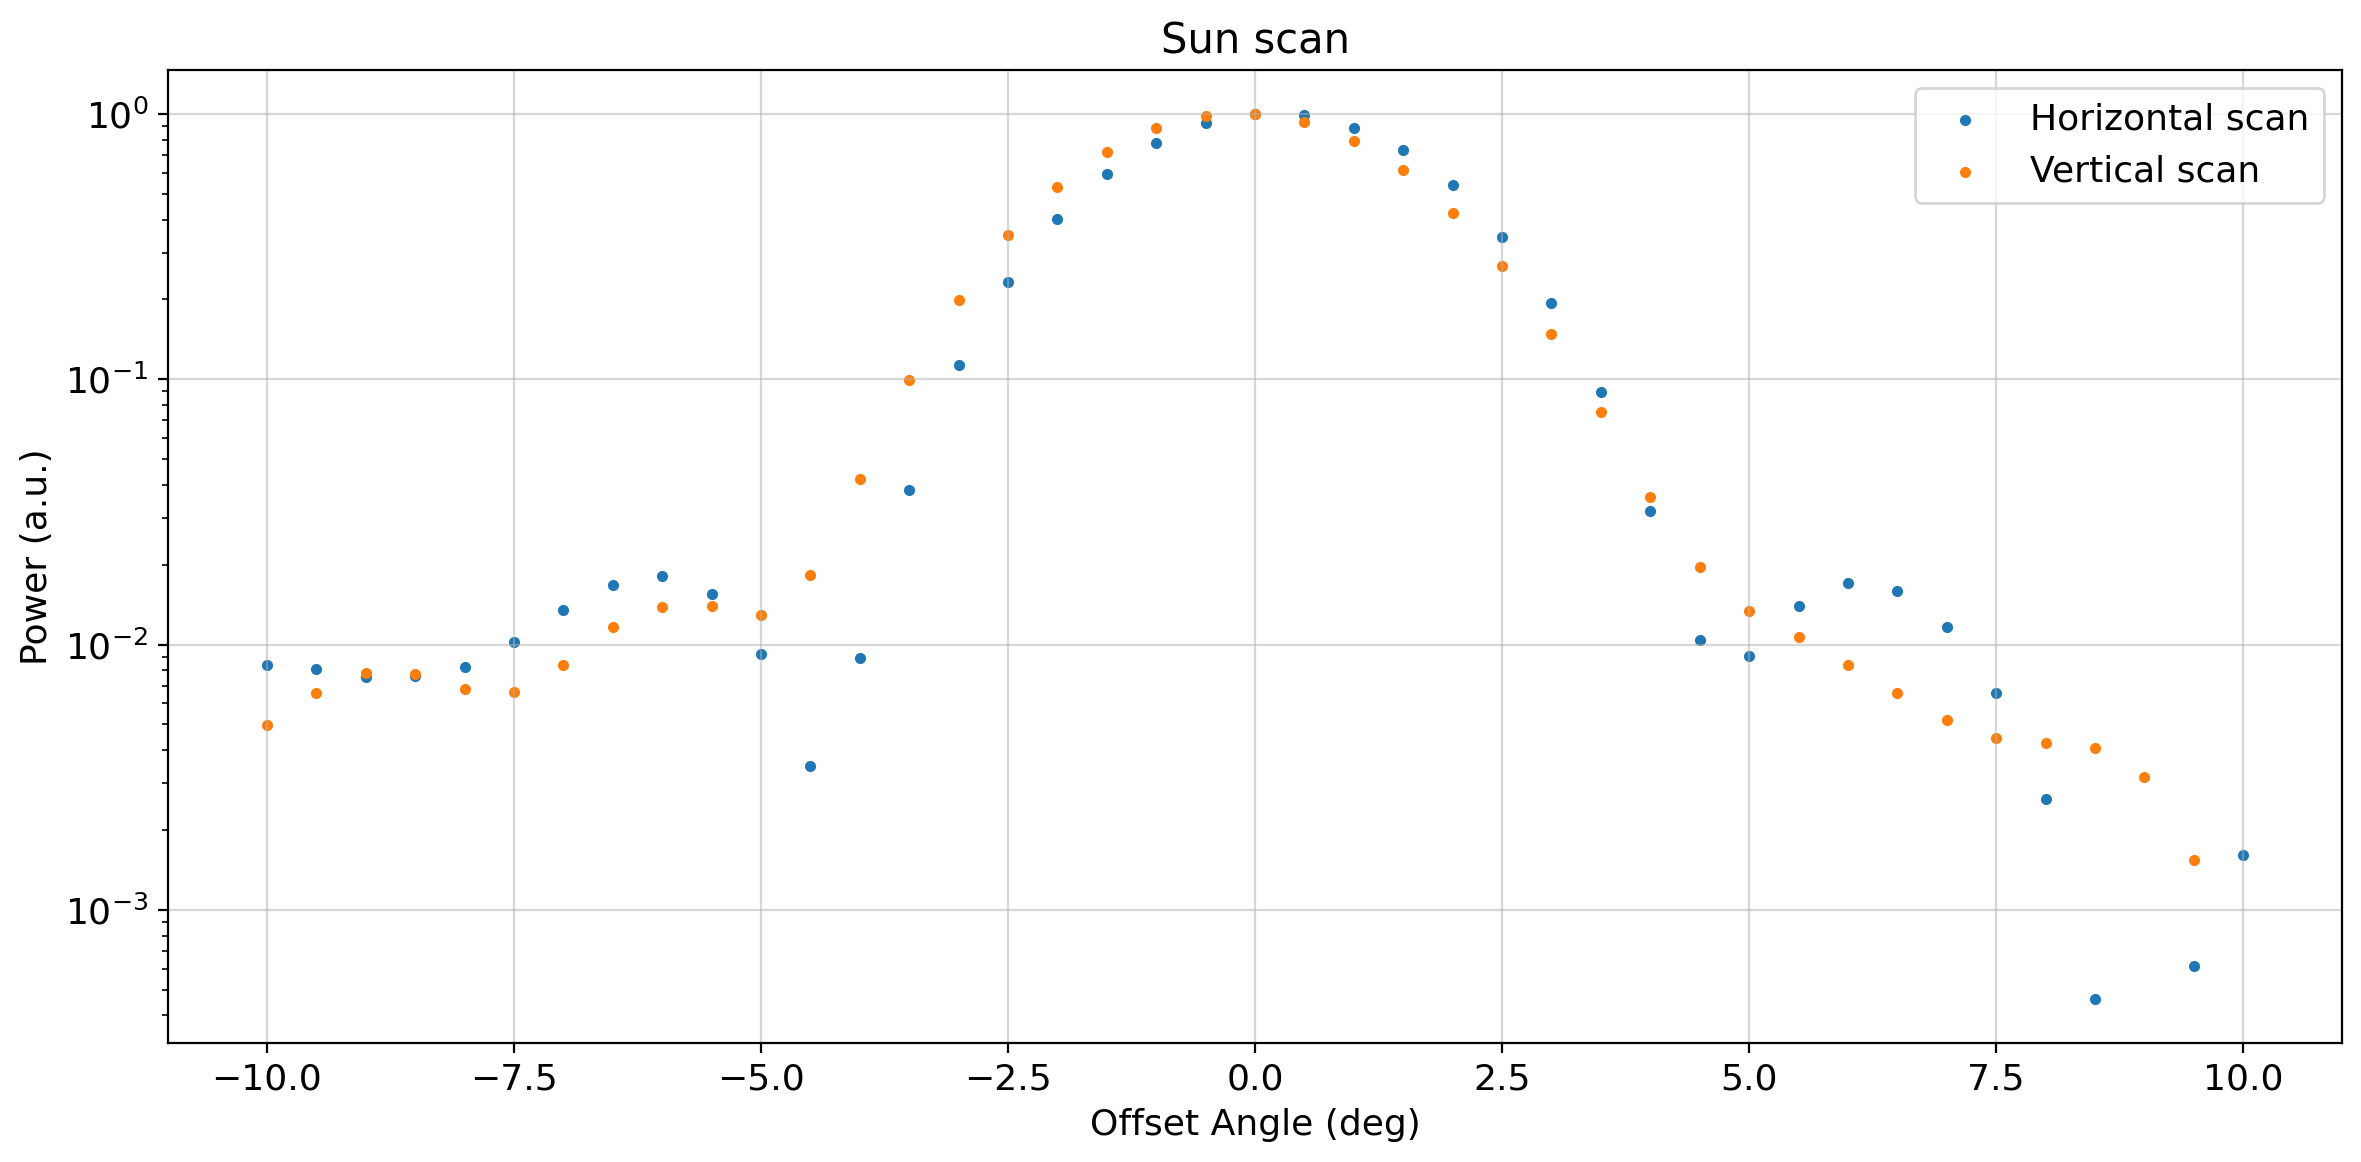

In [4]:
pt.plotting.set_up_plot('Sun scan', 'Offset Angle (deg)', 'Power (a.u.)')
plot_sun_scan('Measurements/SunScan/SunScan_Az10deg_Res0deg5_T1120_20251002.hdf',
              'Measurements/SunScan/SunScan_Elv10deg_Res0deg5_T1120_20251002.hdf')
plt.yscale('log')
plt.legend()
plt.show()

the assymetry in the vertical part of the scan might be due to antenna symmetry, maybe the topmost of the three connecting rods

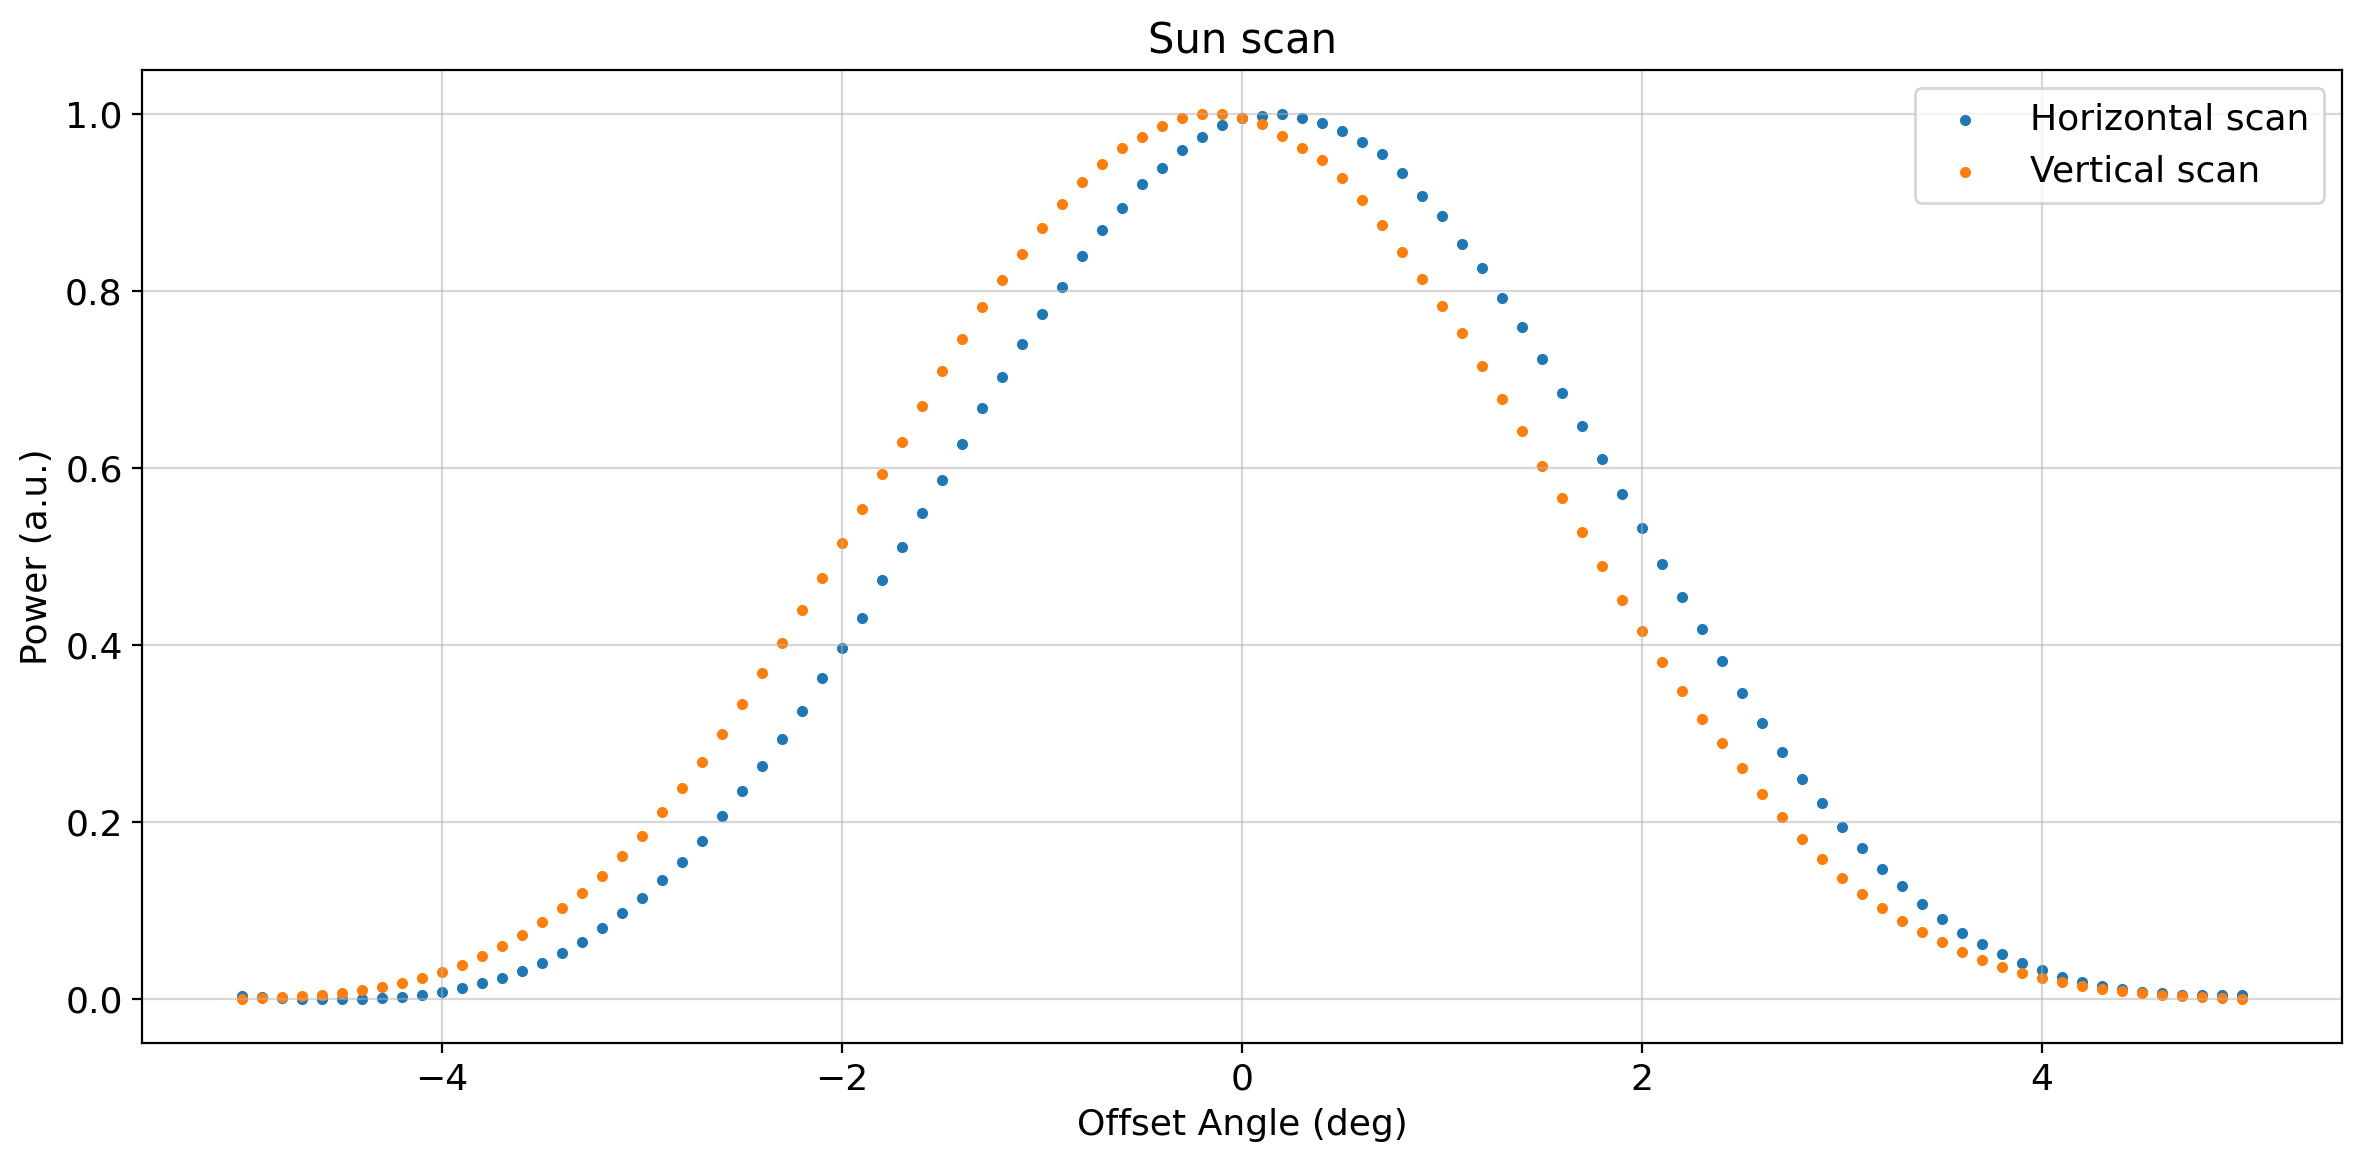

In [5]:
pt.plotting.set_up_plot('Sun scan', 'Offset Angle (deg)', 'Power (a.u.)')
plot_sun_scan('Measurements/SunScan/SunScan_Az5deg_Res0deg1_T1130_20251002.hdf',
              'Measurements/SunScan/SunScan_Elv5deg_Res0deg1_T1130_20251002.hdf')
plt.legend()
plt.show()

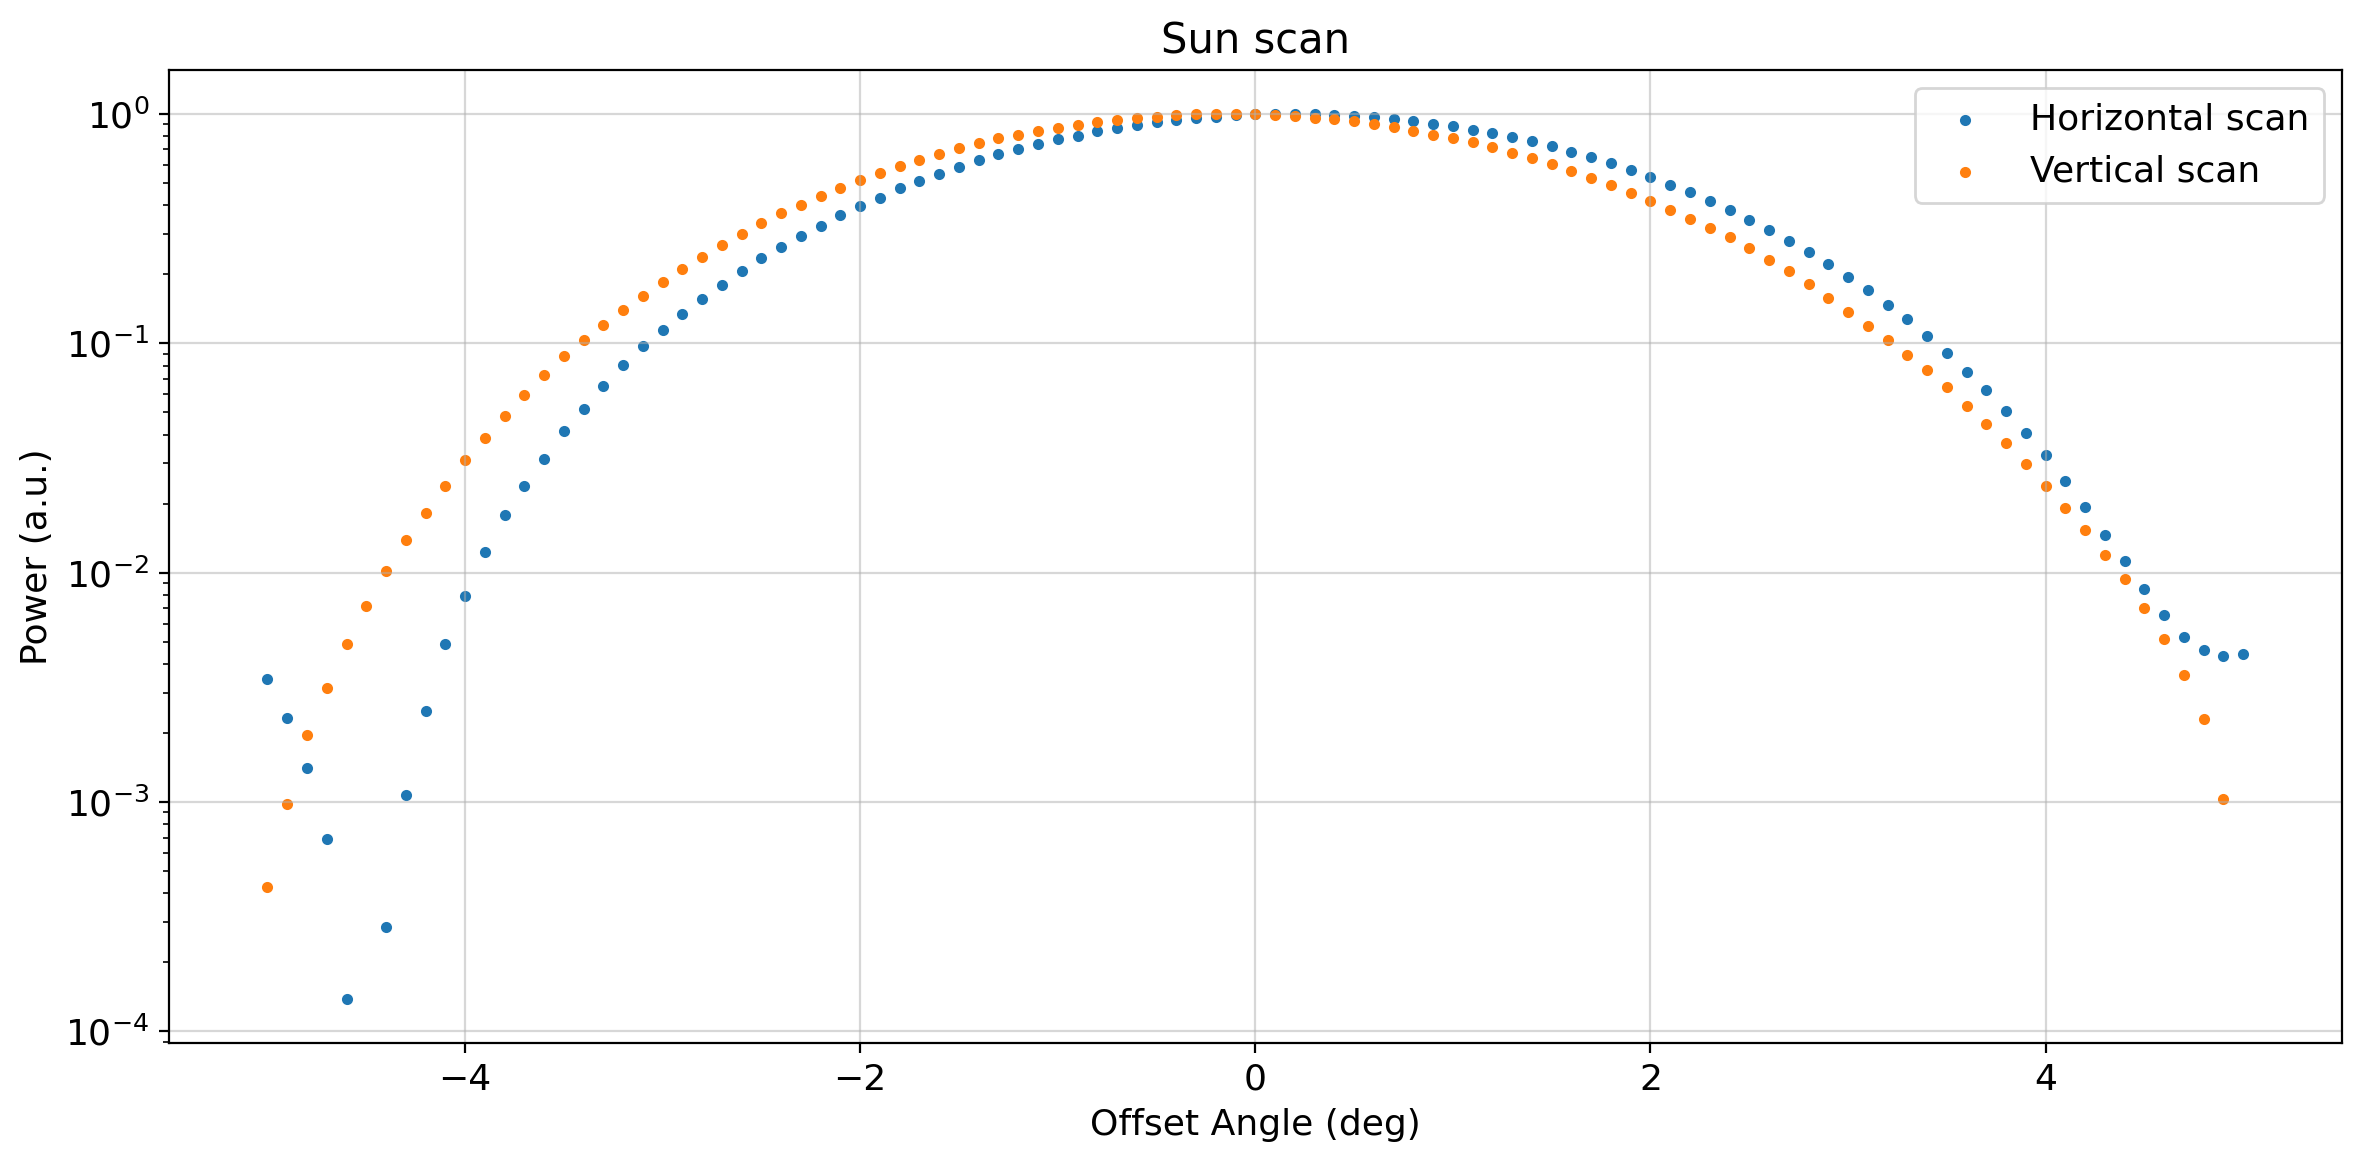

In [6]:
pt.plotting.set_up_plot('Sun scan', 'Offset Angle (deg)', 'Power (a.u.)')
plot_sun_scan('Measurements/SunScan/SunScan_Az5deg_Res0deg1_T1130_20251002.hdf',
              'Measurements/SunScan/SunScan_Elv5deg_Res0deg1_T1130_20251002.hdf')
plt.yscale('log')
plt.legend()
plt.show()

In [7]:
import sympy

with srt_util.SRT_HDF_Reader('Measurements/SunScan/SunScan_Az10deg_Res0deg5_T1120_20251002.hdf') as srt_reader:
    offset = srt_reader.get_object_positions()['CenterH']
    spec = normalize_spectrum(srt_reader.get_power_spectrum().sum(axis=1))

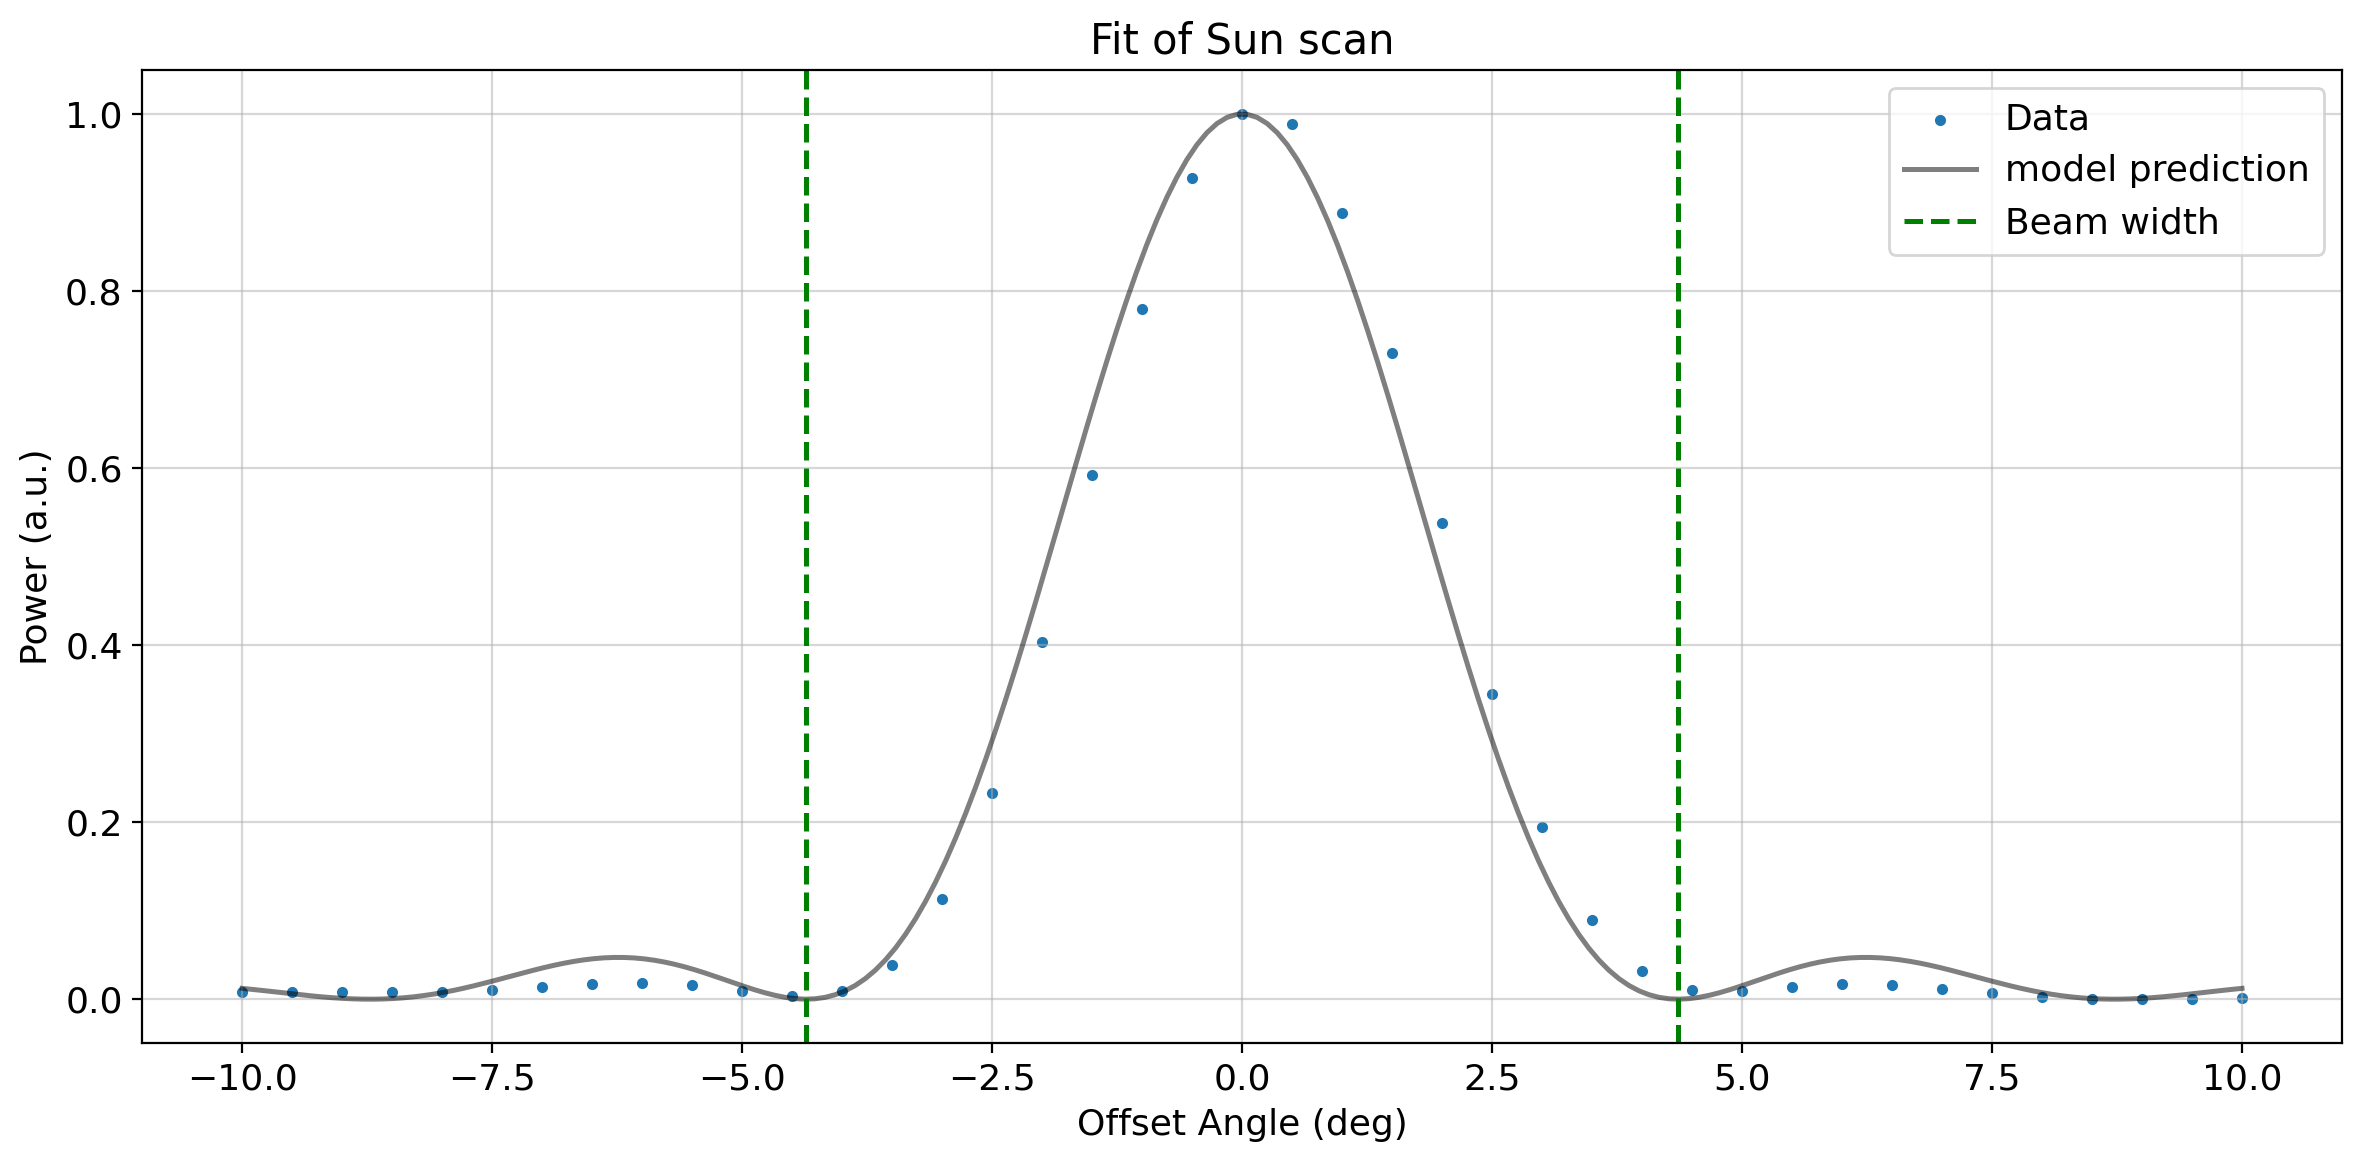

4.36 ± 0.06

\SI{4.36(0.06)}{}


In [8]:
eps = np.finfo(float).eps

phi, P, a = sympy.symbols('phi P a')
model_expr = sympy.sin(phi*a+eps)**2 / (phi*a+eps)**2

f = pt.SympyFunctionalModel(model_expr, [phi], a)
f.parameters = np.array([2])
f.fit(offset, spec)

pt.plotting.set_up_plot('Fit of Sun scan', 'Offset Angle (deg)', 'Power (a.u.)')

plt.scatter(offset, spec, label = 'Data', marker='.')
f.plot_prediction_smooth(errorband=False)
beam_width_mean, beam_width_cov = pt.propagate_error(sympy.pi / a, [a], f.parameters, f.parameter_cof() * f.m_0**2)
beam_width = pt.UErr(beam_width_mean, beam_width_cov[0,0]**0.5)

plt.axvline(beam_width_mean, color='green', linestyle='--', label='Beam width')
plt.axvline(-beam_width_mean, color='green', linestyle='--')

plt.legend()
plt.show()

display(beam_width)
print(beam_width.latex())

In [9]:
with srt_util.SRT_HDF_Reader('Measurements/SunScan/SunScan_Az5deg_Res0deg1_T1130_20251002.hdf') as srt_reader:
    offset = srt_reader.get_object_positions()['CenterH']
    spec = normalize_spectrum(srt_reader.get_power_spectrum().sum(axis=1))

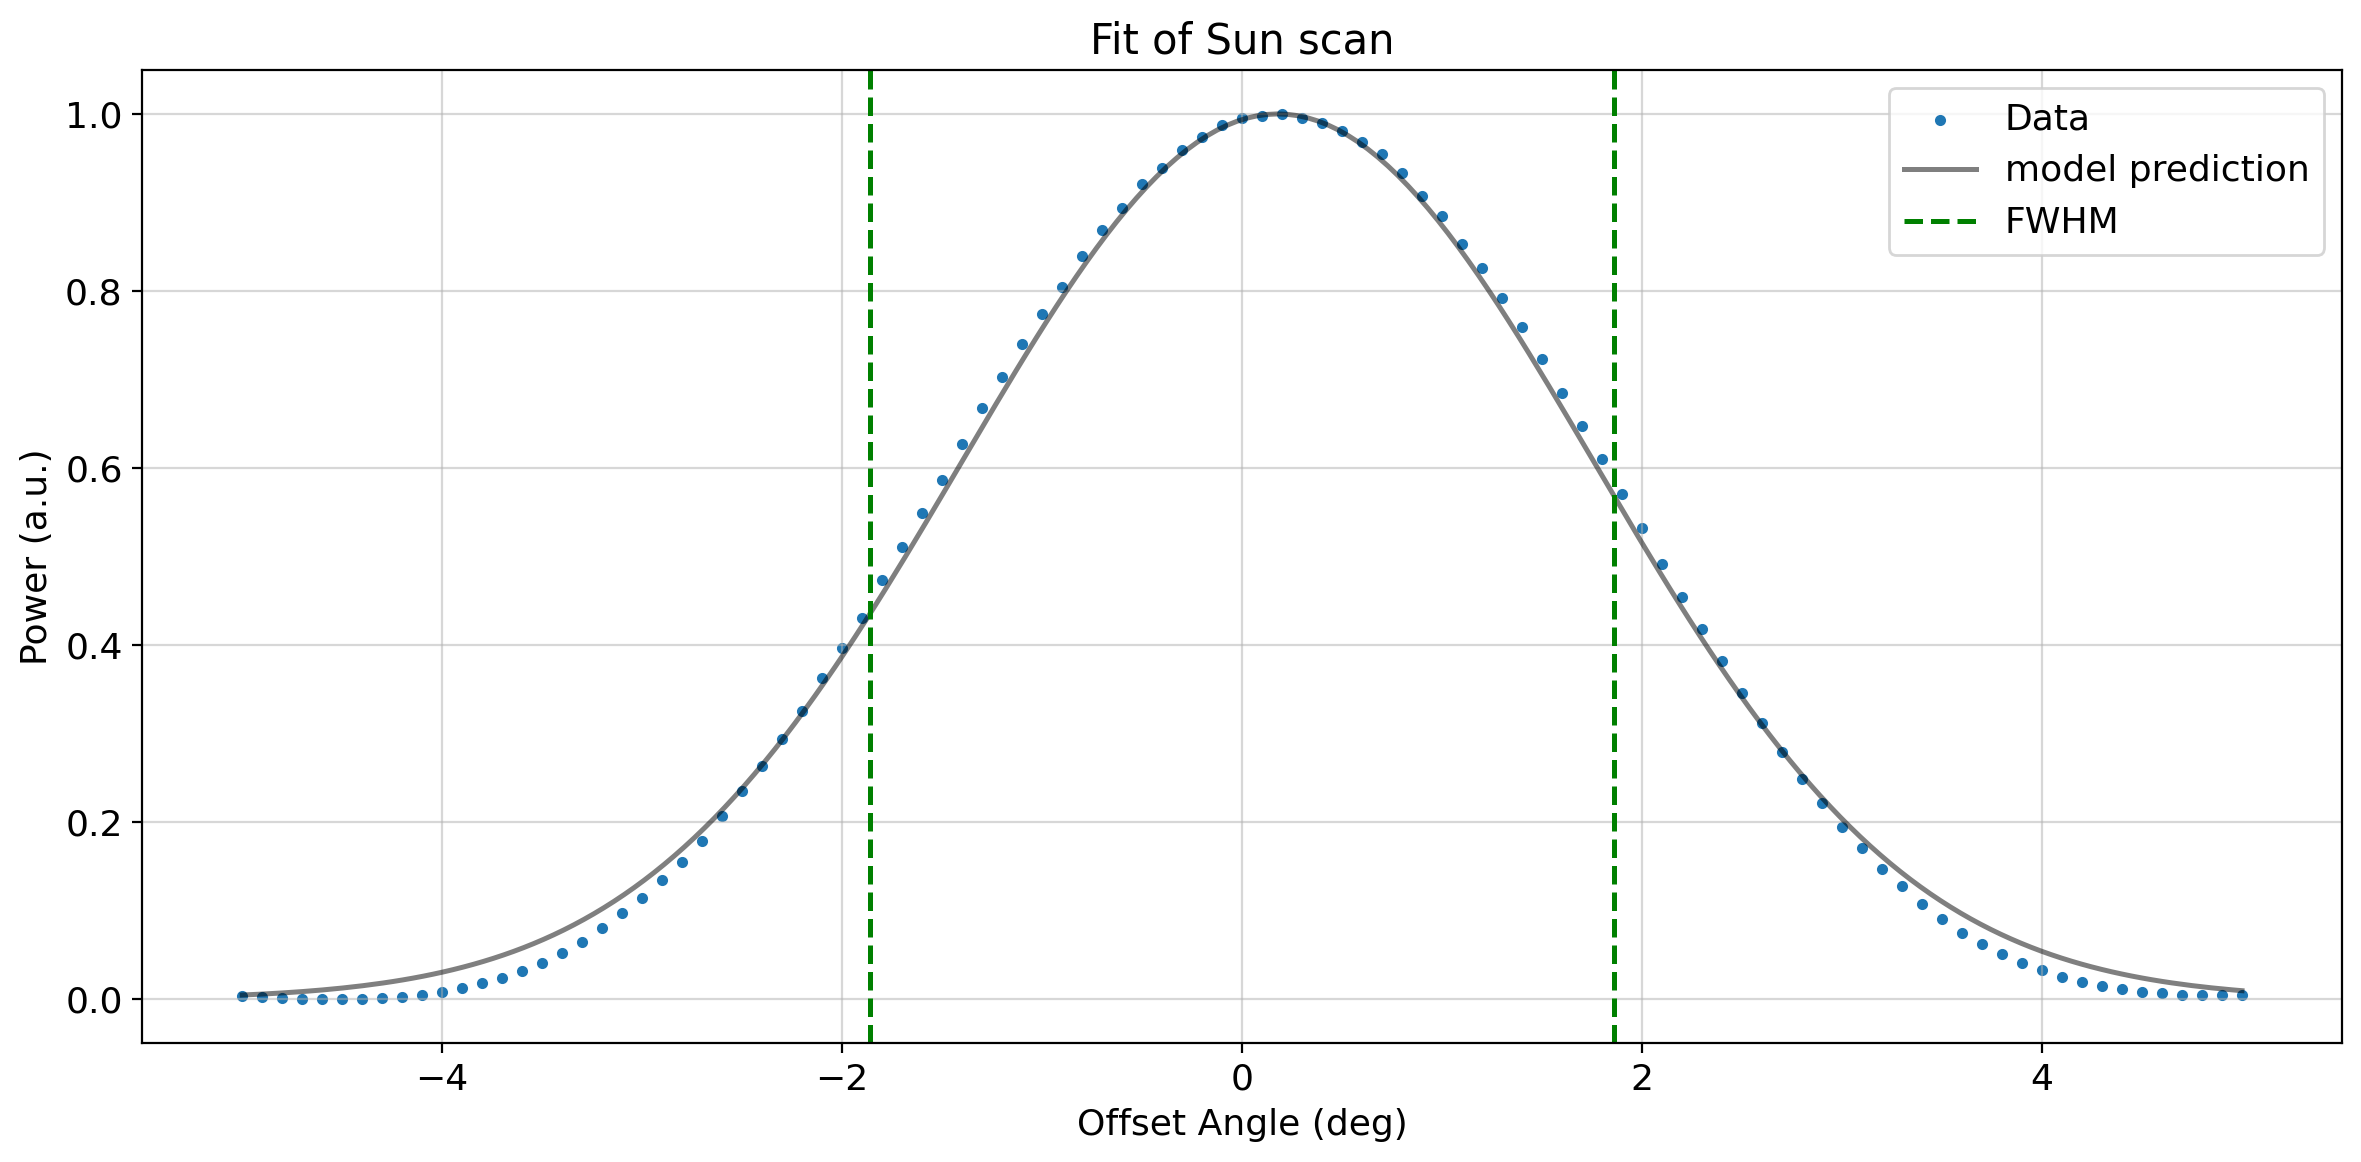

In [10]:
sigma, phi_0 = sympy.symbols('sigma phi_0')

model_expr = sympy.exp(-((phi - phi_0)**2) / (2*sigma**2))
fwhm_expr = sympy.sqrt(2*sympy.log(2))*sigma

f = pt.SympyFunctionalModel(model_expr, [phi_0, sigma], phi)
f.parameters = np.array([0, 1])
f.fit(offset, spec)
fwhm_mean, fwhm_cov = pt.propagate_error(fwhm_expr, f.parameter_symbols,f.parameters, f.parameter_cof() * f.m_0**2)
fwhm = pt.UErr(fwhm_mean, fwhm_cov[0,0]**0.5)


pt.plotting.set_up_plot('Fit of Sun scan', 'Offset Angle (deg)', 'Power (a.u.)')
plt.scatter(offset, spec, label = 'Data', marker='.')
f.plot_prediction_smooth(errorband=False)

plt.axvline(fwhm_mean, color='green', linestyle='--', label='FWHM')
plt.axvline(-fwhm_mean, color='green', linestyle='--')

plt.legend()
plt.show()